# IMPORT

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data featuring


Traitement de donnée

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
datas = pd.concat([train,test])

- Drop du StudentID (irrelevent dans notre cas)
- Encoding Target
- Missing values : 1328 Target (normal car base de test)

In [13]:
train.drop(columns="StudentId",inplace=True)


In [14]:
label_enco = LabelEncoder()
label_target = label_enco.fit_transform(train['Target'])
print(label_target)
# 0 = Dropout , 1 = Enrolled, 2 = Graduate

[0 2 2 ... 1 0 2]


In [15]:
train.drop(columns="Target",axis=1,inplace=True)
train["Target"] = label_target

In [16]:
total = train.isnull().sum().sort_values(ascending=False)

# show
pd.DataFrame(data={'Missing': total}).head(37)

,Missing
Marital status,0
Age at enrollment,0
Curricular units 1st sem (credited),0
Curricular units 1st sem (enrolled),0
Curricular units 1st sem (evaluations),0
Curricular units 1st sem (approved),0
Curricular units 1st sem (grade),0
Curricular units 1st sem (without evaluations),0
Curricular units 2nd sem (credited),0
Curricular units 2nd sem (enrolled),0


## Correlation Matrix

General corr matrix

In [7]:
train_corrmat = train.corr()
print(train_corrmat)

                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.283230   
Application order                                    -0.131919   
Course                                                0.048351   
Daytime/evening attendance\t                         -0.283691   
Previous qualification                                0.058700   
Previous qualification (grade)                       -0.023628   
Nationality                                          -0.001862   
Mother's qualification                                0.189513   
Father's qualification                                0.130368   
Mother's occupation                                   0.020810   
Father's occupation                                   0.019992   
Admission grade                                       0.013980   
Displaced                                            -0.257573   
Educationa

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


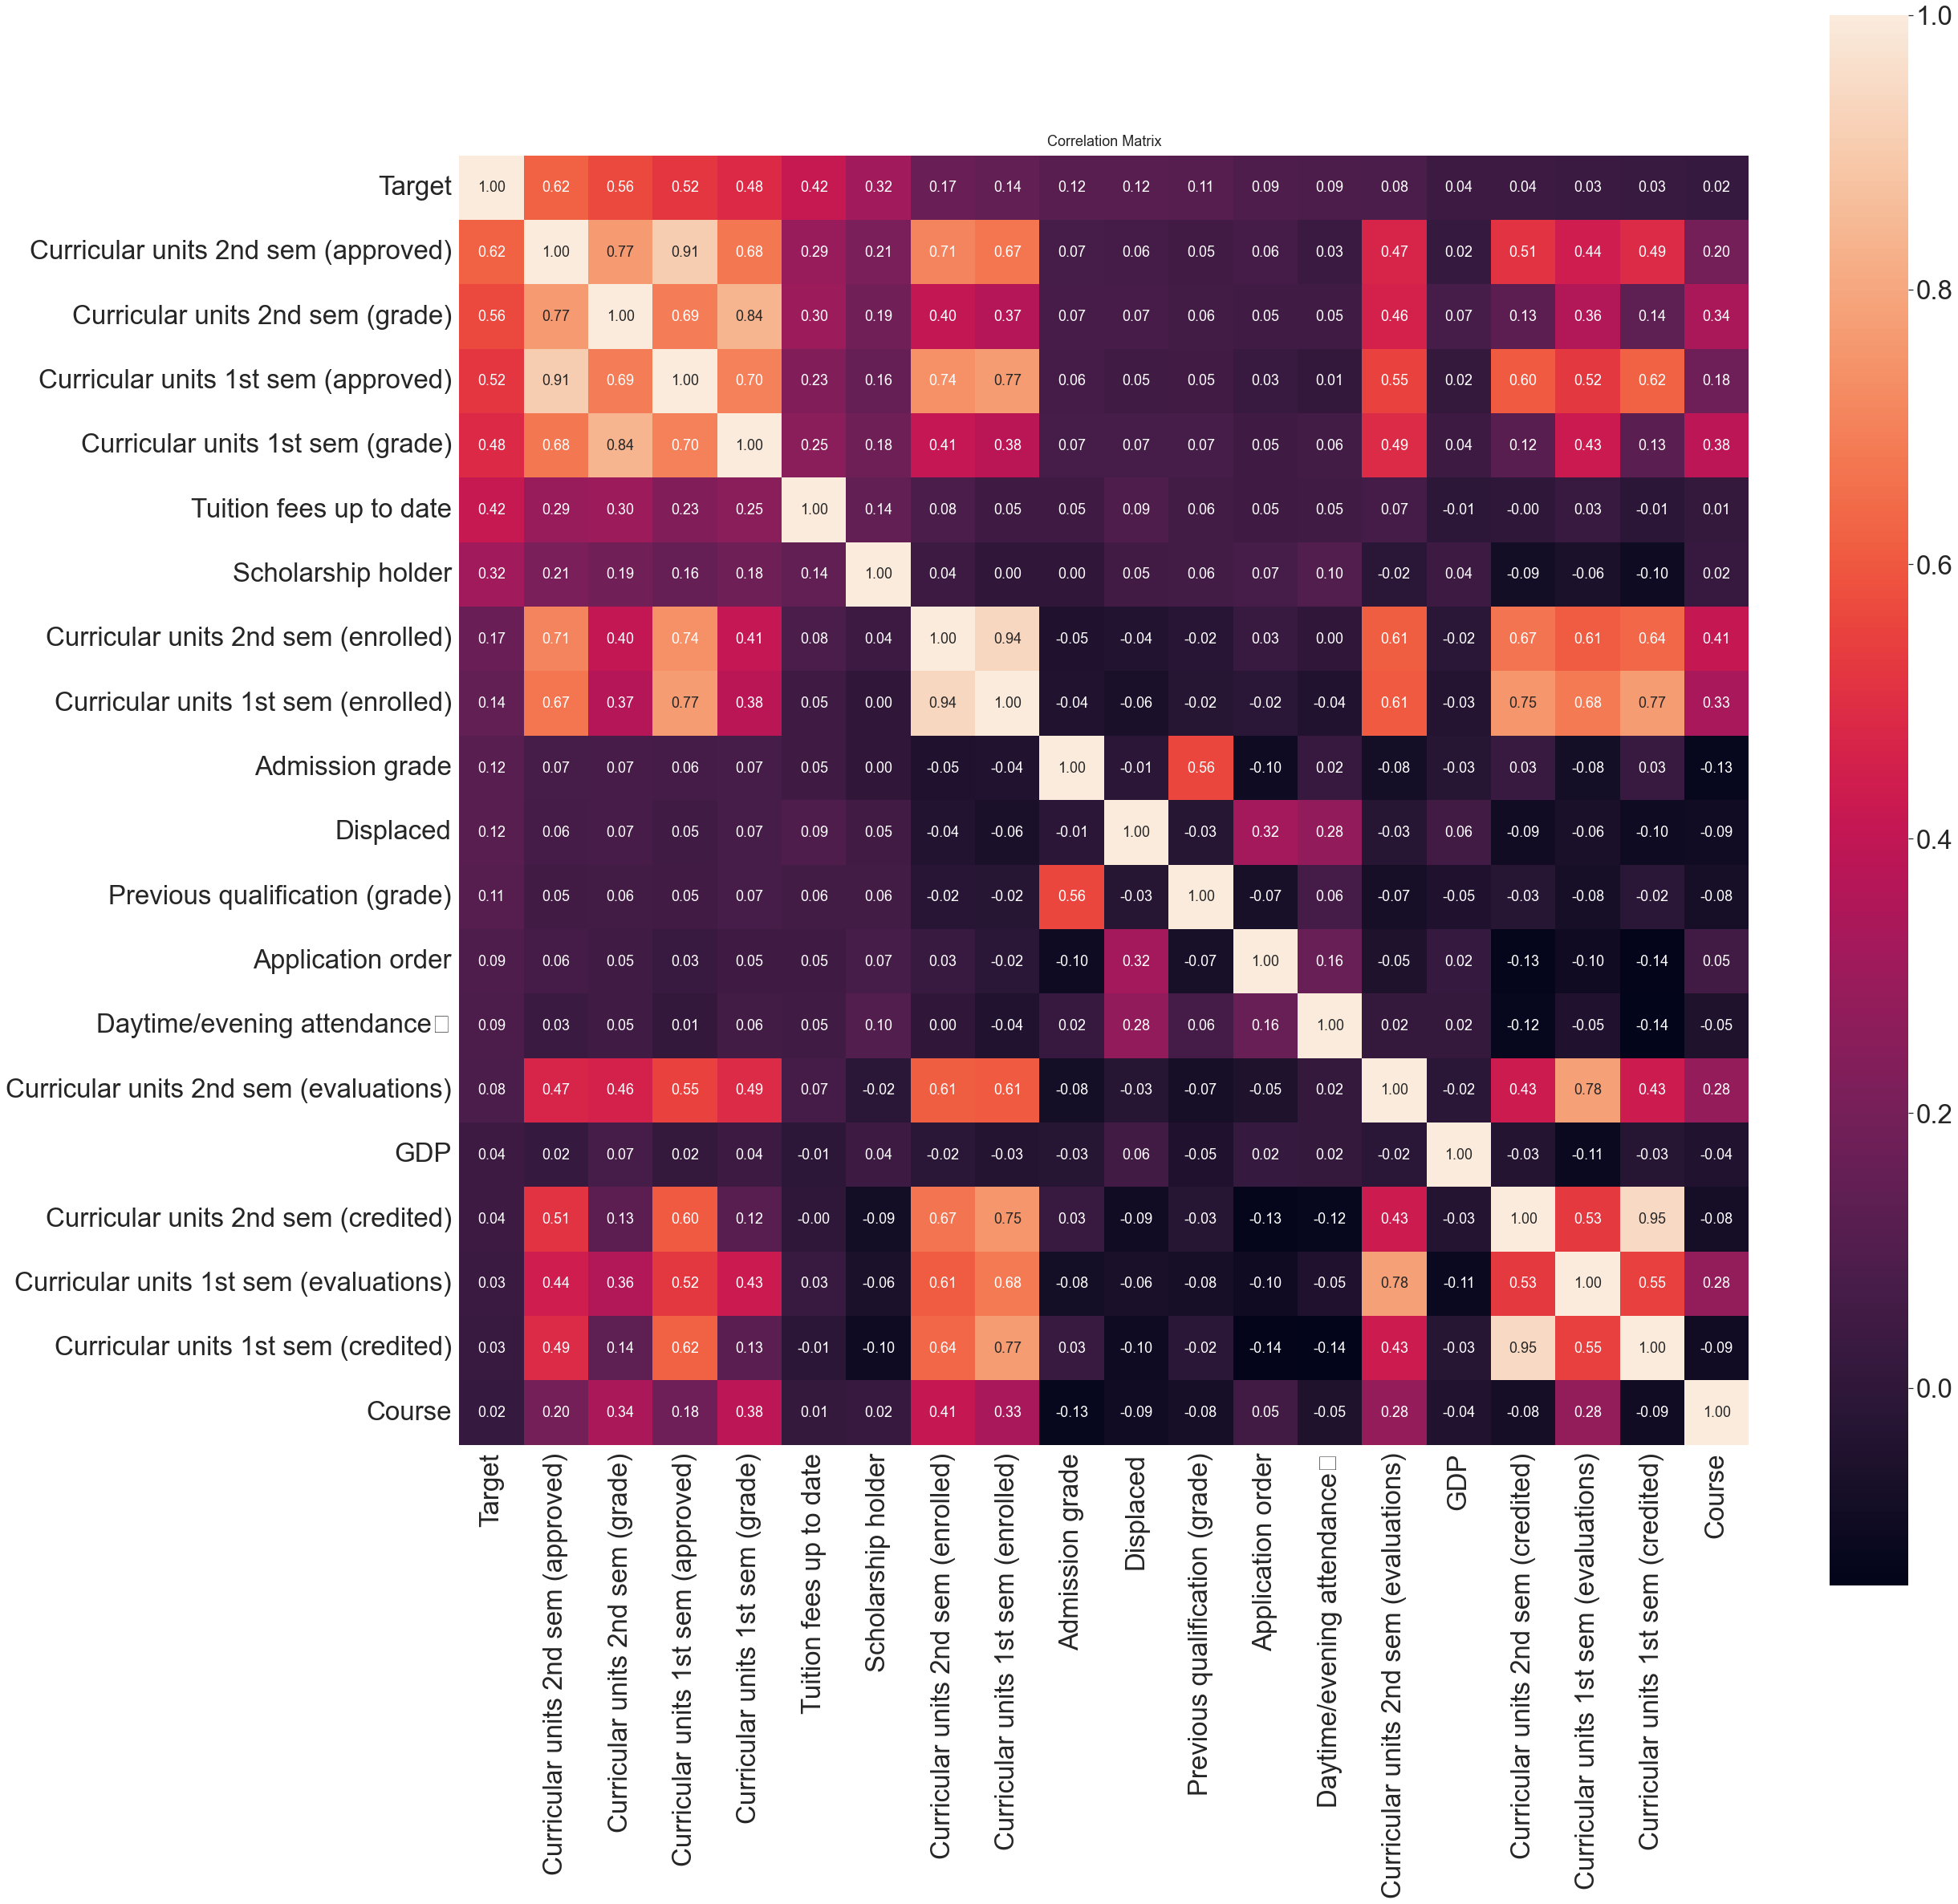

In [8]:
train_corrmat = train.corr()

k=20
cols = train_corrmat.nlargest(k,"Target")["Target"].index
cm = train_corrmat[cols].loc[cols]

plt.figure(figsize = (36,36))
sns.set(font_scale=3)
heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 18}, yticklabels=cols.values, xticklabels=cols.values)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);

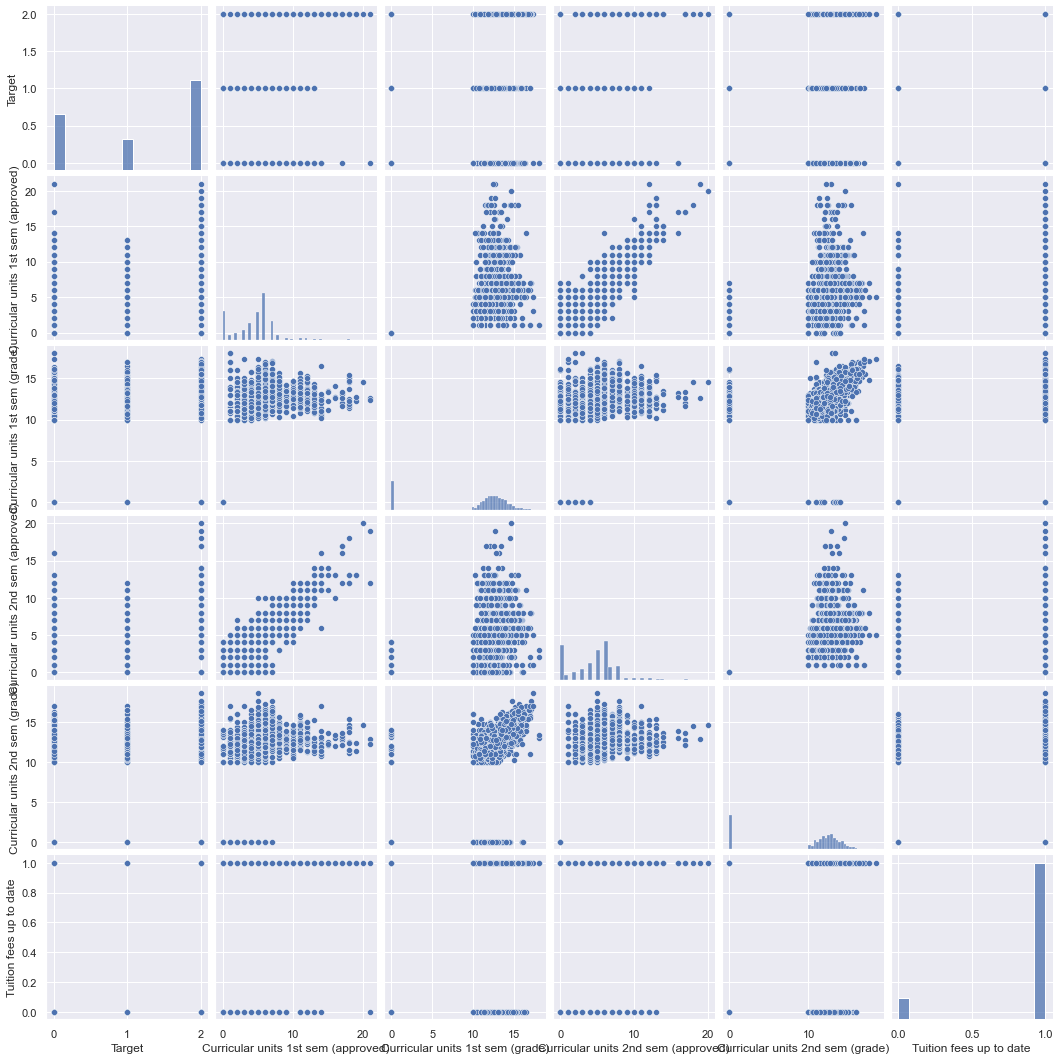

In [69]:
sns.set()

cols = ['Target','Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Tuition fees up to date']
sns.pairplot(train[cols], height = 2.5)
plt.show()

# SelectKBest

In [27]:
from sklearn.feature_selection import SelectKBest, chi2

In [28]:
X_new = SelectKBest(chi2,k=20).fit_transform(X_train,y_train)
print(X_new)

ValueError: Input X must be non-negative.

# SVM

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [75]:
svm = make_pipeline(StandardScaler(),SVC(kernel = 'linear',random_state=0))

In [17]:
y = np.array(train['Target'])
X = np.array(train.drop('Target',axis=1))
X_train, X_valid, y_train,y_valid = train_test_split(X,y,test_size = 0.33, random_state=42)

In [18]:
X_test = test.drop(columns="StudentId")

Train/Validation result

In [77]:

svm.fit(X_train,y_train)
y_pred = svm.predict(X_valid)

In [78]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       306
           1       0.47      0.35      0.40       184
           2       0.81      0.93      0.87       532

    accuracy                           0.76      1022
   macro avg       0.70      0.67      0.68      1022
weighted avg       0.75      0.76      0.75      1022



Cross Validation Result

In [147]:
cross_scores = cross_val_score(svm,X,y,cv=5,scoring="f1_weighted")

In [148]:
print(cross_scores)
print(np.mean(cross_scores))

[0.77360554 0.79339425 0.73567143 0.73802033 0.76197217]
0.760532745178692


In [192]:

svm_dataframe = pd.DataFrame({"Target" : label_enco.inverse_transform(svm.predict(X_test))})
svm_dataframe["StudentId"] = test["StudentId"]
svm_dataframe = svm_dataframe.iloc[:, ::-1]
print(svm_dataframe)

      StudentId    Target
0          3097  Graduate
1          3098  Graduate
2          3099  Graduate
3          3100  Graduate
4          3101  Enrolled
...         ...       ...
1323       4420  Graduate
1324       4421   Dropout
1325       4422  Enrolled
1326       4423   Dropout
1327       4424  Graduate

[1328 rows x 2 columns]


In [196]:
svm_dataframe.to_csv("predictions/svm_prediction.csv",index=False)

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
params = {"n_estimators": [10,70,80,90,100,120,150,200,250,280,300],
        "max_features":[0.3,0.4,0.5,0.6,0.8,1]}

cv = 5
random_Forest = RandomForestClassifier(random_state=42)
forest_cv = GridSearchCV(random_Forest,params,scoring='f1_weighted',cv=cv,verbose=1,n_jobs=4)
forest_cv.fit(X_train,y_train)

score = forest_cv.score(X_valid,y_valid)
print('Random forest: {:.2f}'.format(score))
print('-----')
print('Best hyper-params: ' + str(forest_cv.best_params_))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Random forest: 0.76
-----
Best hyper-params: {'max_features': 0.5, 'n_estimators': 90}


In [190]:
final_random_Forest = RandomForestClassifier(random_state=42,max_features=0.5,n_estimators=90)
final_random_Forest.fit(X_train,y_train)
forest_dataframe = pd.DataFrame({"Target" : label_enco.inverse_transform(final_random_Forest.predict(X_test))})
forest_dataframe["StudentId"] = test["StudentId"]
forest_dataframe = forest_dataframe.iloc[:, ::-1]
print(forest_dataframe)

      StudentId    Target
0          3097  Graduate
1          3098  Graduate
2          3099  Graduate
3          3100  Graduate
4          3101  Enrolled
...         ...       ...
1323       4420  Graduate
1324       4421   Dropout
1325       4422  Graduate
1326       4423   Dropout
1327       4424  Graduate

[1328 rows x 2 columns]


In [191]:
forest_dataframe.to_csv("./predictions/forest_prediction.csv",index=False)

# Gradient Boosting

In [129]:


gradient_params = {"learning_rate" : [0.001, 0.01, 0.1],
             "max_depth": [1, 2, 3, 4, 5],
             'min_samples_leaf': [10, 30, 60, 90, 120],
             'min_samples_split': [30, 60, 90, 120],
             "subsample": [	0.2, 0.4, 0.6, 0.8, 1]}



gradient_model = GradientBoostingClassifier(n_estimators=90)
gradient_gridSearch = GridSearchCV(gradient_model,gradient_params,cv=cv,verbose=1,n_jobs=4)
gradient_gridSearch.fit(X_train,y_train)



Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_estimators=90),
             n_jobs=4,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 30, 60, 90, 120],
                         'min_samples_split': [30, 60, 90, 120],
                         'subsample': [0.2, 0.4, 0.6, 0.8, 1]},
             verbose=1)

In [130]:
print('Best hyperparameters: ' + str(gradient_gridSearch.best_params_))

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 120, 'min_samples_split': 60, 'subsample': 0.8}


In [140]:
final_gradient_model = GradientBoostingClassifier(n_estimators=90,learning_rate=0.1,max_depth=4,min_samples_leaf=120,min_samples_split=60,subsample=0.8)
gradient_cross_scores = cross_val_score(final_gradient_model,X,y,cv=5,scoring="f1_weighted")

In [144]:
print(gradient_cross_scores)

[0.77475201 0.75455368 0.75869761 0.73866528 0.7476152 ]


In [145]:
print(gradient_cross_scores)
print(np.mean(gradient_cross_scores))

[0.77475201 0.75455368 0.75869761 0.73866528 0.7476152 ]
0.7548567562386741


In [186]:

final_gradient_model.fit(X_train,y_train)
gradient_dataframe = pd.DataFrame({"Target" : label_enco.inverse_transform(final_gradient_model.predict(X_test))})
gradient_dataframe["StudentId"] = test["StudentId"]
gradient_dataframe = gradient_dataframe.iloc[:, ::-1]
print(gradient_dataframe)


      StudentId    Target
0          3097  Graduate
1          3098  Graduate
2          3099  Graduate
3          3100  Graduate
4          3101  Enrolled
...         ...       ...
1323       4420  Graduate
1324       4421   Dropout
1325       4422  Enrolled
1326       4423   Dropout
1327       4424  Graduate

[1328 rows x 2 columns]


In [187]:
gradient_dataframe.to_csv("./predictions/gradient_prediction.csv",index=False)

# Stacking

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [22]:
models = [('Random Forest', RandomForestClassifier(random_state=42,max_features=0.5,n_estimators=90)),
         ('Gradient Booster', GradientBoostingClassifier(n_estimators=90,learning_rate=0.1,max_depth=4,min_samples_leaf=120,min_samples_split=60,subsample=0.8)),
         ('SVM' , make_pipeline(StandardScaler(),SVC(kernel = 'linear',random_state=0)))]
#,('SVM' , make_pipeline(StandardScaler(),SVC(kernel = 'linear',random_state=0)))
stacking = StackingClassifier(models,final_estimator = LogisticRegression(),cv=5,n_jobs = 4,passthrough = False,verbose = 1 )
stacking.fit(X_train,y_train)
stacking_score = stacking.score(X_valid,y_valid)
print(stacking_score)



0.7583170254403131


In [23]:
stacking_dataframe = pd.DataFrame({"Target" : label_enco.inverse_transform(stacking.predict(X_test))})
stacking_dataframe["StudentId"] = test["StudentId"]
stacking_dataframe = stacking_dataframe.iloc[:, ::-1]
print(stacking_dataframe)

      StudentId    Target
0          3097  Graduate
1          3098  Graduate
2          3099  Graduate
3          3100  Graduate
4          3101  Enrolled
...         ...       ...
1323       4420  Graduate
1324       4421   Dropout
1325       4422  Enrolled
1326       4423   Dropout
1327       4424  Graduate

[1328 rows x 2 columns]


C:\Users\basti\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\basti\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [24]:
stacking_dataframe.to_csv("./predictions/stacking_prediction.csv",index=False)